# **Clustering Problem**

**Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing Dataset**

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Muluemeb/My-Assignment/main/austin_weather.csv')


In [ ]:
weather = dataset[['TempHighF', 'TempAvgF']]

In [ ]:
weather.columns = ['TempHighF', 'TempAvgF']

In [ ]:
weather.isnull().sum()

TempHighF    0
TempAvgF     0
dtype: int64

In [ ]:
weather_ref = weather.dropna(how='any', axis=0)

In [ ]:
weather_ref.isnull().sum()

TempHighF    0
TempAvgF     0
dtype: int64

In [ ]:
X = weather_ref.iloc[:, [0, 1]].values
#X_dataframe = pd.DataFrame(X) 

**Evalauating by calculating the value of k**

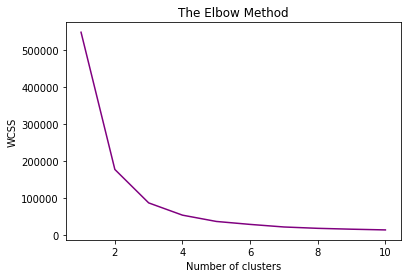

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss , color = 'purple')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

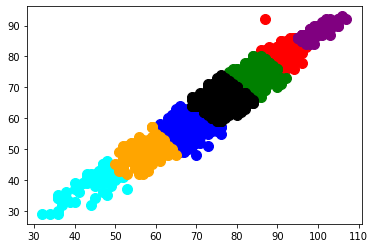

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'purple', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'orange', label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = 'grey', label = 'Cluster 8')

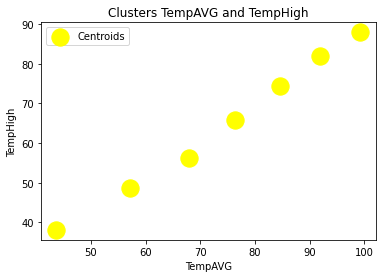

In [ ]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters TempAVG and TempHigh')
plt.xlabel('TempAVG')
plt.ylabel('TempHigh')
plt.legend()
plt.show()

# **Regression Problem**

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Importing Dataset**

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Muluemeb/My-Assignment/main/austin_weather.csv")

In [ ]:
data.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

In [ ]:
print(data['DewPointHighF'].unique())

['67' '43' '31' '36' '44' '39' '41' '49' '51' '37' '55' '54' '15' '29'
 '60' '64' '58' '28' '42' '22' '38' '45' '19' '59' '62' '40' '17' '53'
 '34' '48' '52' '61' '63' '33' '57' '65' '46' '32' '50' '27' '56' '47'
 '68' '69' '66' '70' '73' '71' '76' '72' '75' '74' '-' '77' '23' '35' '30'
 '79' '78' '80' '26' '18' '25' '13']


In [ ]:
data['DewPointHighF'] = data['DewPointHighF'].str.replace('-','')
data['DewPointAvgF'] = data['DewPointAvgF'].str.replace('-','')
data['DewPointLowF'] = data['DewPointLowF'].str.replace('-','')
data['HumidityHighPercent'] = data['HumidityHighPercent'].str.replace('-','')
data['HumidityAvgPercent'] = data['HumidityAvgPercent'].str.replace('-','')
data['HumidityLowPercent'] = data['HumidityLowPercent'].str.replace('-','')
data['SeaLevelPressureHighInches'] = data['SeaLevelPressureHighInches'].str.replace('-','')
data['SeaLevelPressureAvgInches'] = data['SeaLevelPressureAvgInches'].str.replace('-','')
data['SeaLevelPressureLowInches'] = data['SeaLevelPressureLowInches'].str.replace('-','')
data['VisibilityHighMiles'] = data['VisibilityHighMiles'].str.replace('-','')
data['VisibilityAvgMiles'] = data['VisibilityAvgMiles'].str.replace('-','')
data['VisibilityLowMiles'] = data['VisibilityLowMiles'].str.replace('-','')
data['WindHighMPH'] = data['WindHighMPH'].str.replace('-','')
data['WindAvgMPH'] = data['WindAvgMPH'].str.replace('-','')
data['WindGustMPH'] = data['WindGustMPH'].str.replace('-','')
data['PrecipitationSumInches'] = data['PrecipitationSumInches'].str.replace('T','')

In [ ]:
#Changing the Column data type to the required Data type.

data['DewPointHighF'] = pd.to_numeric(data['DewPointHighF'])
data['DewPointAvgF'] = pd.to_numeric(data['DewPointAvgF'])
data['DewPointLowF'] = pd.to_numeric(data['DewPointLowF'])
data['HumidityHighPercent'] = pd.to_numeric(data['HumidityHighPercent'])
data['HumidityAvgPercent'] = pd.to_numeric(data['HumidityAvgPercent'])
data['HumidityLowPercent'] = pd.to_numeric(data['HumidityLowPercent'])
data['SeaLevelPressureHighInches'] = pd.to_numeric(data['SeaLevelPressureHighInches'])
data['SeaLevelPressureAvgInches'] = pd.to_numeric(data['SeaLevelPressureAvgInches'])
data['SeaLevelPressureLowInches'] = pd.to_numeric(data['SeaLevelPressureLowInches'])
data['VisibilityHighMiles'] = pd.to_numeric(data['VisibilityHighMiles'])
data['VisibilityAvgMiles'] = pd.to_numeric(data['VisibilityAvgMiles'])
data['VisibilityLowMiles'] = pd.to_numeric(data['VisibilityLowMiles'])
data['WindHighMPH'] = pd.to_numeric(data['WindHighMPH'])
data['WindAvgMPH'] = pd.to_numeric(data['WindAvgMPH'])
data['WindGustMPH'] = pd.to_numeric(data['WindGustMPH'])
data['PrecipitationSumInches'] = pd.to_numeric(data['PrecipitationSumInches'])

In [ ]:
data.isnull().sum()

Date                            0
TempHighF                       0
TempAvgF                        0
TempLowF                        0
DewPointHighF                   7
DewPointAvgF                    7
DewPointLowF                    7
HumidityHighPercent             2
HumidityAvgPercent              2
HumidityLowPercent              2
SeaLevelPressureHighInches      3
SeaLevelPressureAvgInches       3
SeaLevelPressureLowInches       3
VisibilityHighMiles            12
VisibilityAvgMiles             12
VisibilityLowMiles             12
WindHighMPH                     2
WindAvgMPH                      2
WindGustMPH                     4
PrecipitationSumInches        124
Events                          0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.describe()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
count,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,80.952663,70.528318,59.601014,61.310228,56.384615,50.678783,87.739645,66.272189,44.295858,30.111412,30.022096,29.931175,9.990702,9.139476,6.808115,13.191040,4.975486,21.300085,0.127380
std,14.841901,14.142399,14.343669,13.719980,14.984651,16.281365,11.193643,12.744009,17.279440,0.180415,0.172844,0.172662,0.171826,1.477979,3.756263,3.436249,2.069088,5.878959,0.450287
min,32.000000,29.000000,19.000000,13.000000,8.000000,2.000000,37.000000,27.000000,10.000000,29.630000,29.550000,29.410000,5.000000,2.000000,0.000000,6.000000,1.000000,9.000000,0.000000
25%,72.000000,61.000000,49.000000,52.000000,46.000000,38.000000,84.000000,59.000000,31.000000,29.990000,29.910000,29.820000,10.000000,9.000000,2.000000,10.000000,3.000000,17.000000,0.000000
50%,83.000000,73.000000,62.000000,66.000000,61.000000,55.000000,90.000000,66.000000,42.000000,30.080000,30.000000,29.910000,10.000000,10.000000,9.000000,13.000000,5.000000,21.000000,0.000000
75%,93.000000,83.000000,73.000000,73.000000,69.000000,65.000000,94.000000,74.000000,54.000000,30.210000,30.100000,30.020000,10.000000,10.000000,10.000000,15.000000,6.000000,25.000000,0.010000
max,107.000000,93.000000,81.000000,80.000000,76.000000,75.000000,100.000000,97.000000,93.000000,30.830000,30.740000,30.610000,10.000000,10.000000,10.000000,29.000000,12.000000,57.000000,5.200000


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month

In [ ]:
data.drop(columns='Date',inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


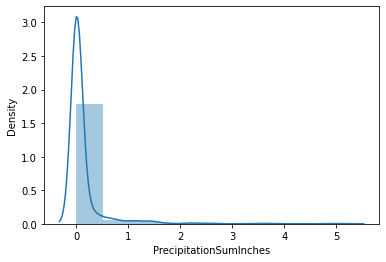

In [ ]:
sns.distplot(data['PrecipitationSumInches'],bins=10)

In [ ]:
data2 = data[['TempAvgF','DewPointAvgF','HumidityAvgPercent','SeaLevelPressureAvgInches','VisibilityAvgMiles','WindAvgMPH','PrecipitationSumInches','Events','Year','Month']]

In [ ]:
x = data.drop(columns=['PrecipitationSumInches','Events','Year'])
y = data['PrecipitationSumInches']

In [ ]:
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std = pd.DataFrame(x_std,columns=x.columns)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.2,random_state=42)

In [ ]:
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predicted = reg_model.predict(x_test)

**Evaluating Results**

In [ ]:
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))

Mean absolute error = 0.18399138713597485
Mean squared error = 0.10947044385464896
R2 score = 0.42453712249385156


# **Classification Problem**

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.model_selection import train_test_split

**Importing Dataset**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Muluemeb/My-Assignment/main/austin_weather.csv', parse_dates=['Date'])

In [ ]:
condition = data['Events'].str.contains(' ')
to_be_kept = ['Date','TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'Events']

In [ ]:
# excluding clear weather
polished_data = data[condition == False]

In [ ]:
# i keep only a few choosen columns
polished_data = polished_data.loc[:, polished_data.columns.intersection(to_be_kept)]
X = polished_data[set(list(polished_data.columns))-set(['Events', 'Date'])]
y = polished_data['Events']

In [ ]:
# this function generates n = len(max_depths) decision trees. Each of depth max_depths[i]
# fits on x_train, y_train, predicts on x_test
# returns classifiers and predictions
def many_decision_trees(max_depths, criterion, x_train, y_train, x_test, y_test):
    clf_array = []
    predictions_array = []
    
    for depth in max_depths:
        clf = tree.DecisionTreeClassifier(max_depth=depth, criterion=criterion)
        clf = clf.fit(x_train, y_train) 
        prediction = clf.predict(x_test)
        
        print('Tree depth: {} Accuracy: {}'.format(depth, accuracy_score(y_test, prediction)))
        
        clf_array.append(clf)
        predictions_array.append(prediction)
    return clf_array, predictions_array

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
depths = list(range(3, 8))

In [ ]:
# lets try the decision tree
# first predicting on training data
print('Prediction on training data -------------------------')
clfs_tr, predictions_tr = many_decision_trees(depths, 'entropy', X_train, y_train, X_train, y_train)  

Prediction on training data -------------------------
Tree depth: 3 Accuracy: 0.8961038961038961
Tree depth: 4 Accuracy: 0.9025974025974026
Tree depth: 5 Accuracy: 0.9090909090909091
Tree depth: 6 Accuracy: 0.935064935064935
Tree depth: 7 Accuracy: 0.961038961038961


In [ ]:
# then predicting on test data
print('\nPrediction on test data -----------------------------')
clfs_te, predictions_te = many_decision_trees(depths, 'entropy', X_train, y_train, X_test, y_test)  


Prediction on test data -----------------------------
Tree depth: 3 Accuracy: 0.8157894736842105
Tree depth: 4 Accuracy: 0.8157894736842105
Tree depth: 5 Accuracy: 0.8157894736842105
Tree depth: 6 Accuracy: 0.7894736842105263
Tree depth: 7 Accuracy: 0.7894736842105263


In [ ]:
print('Classes: {}'.format(clfs_te[0].classes_))
print('Features: {}'.format(list(X)))

Classes: ['Fog' 'Rain' 'Thunderstorm']
Features: ['HumidityAvgPercent', 'DewPointAvgF', 'TempAvgF', 'SeaLevelPressureAvgInches']


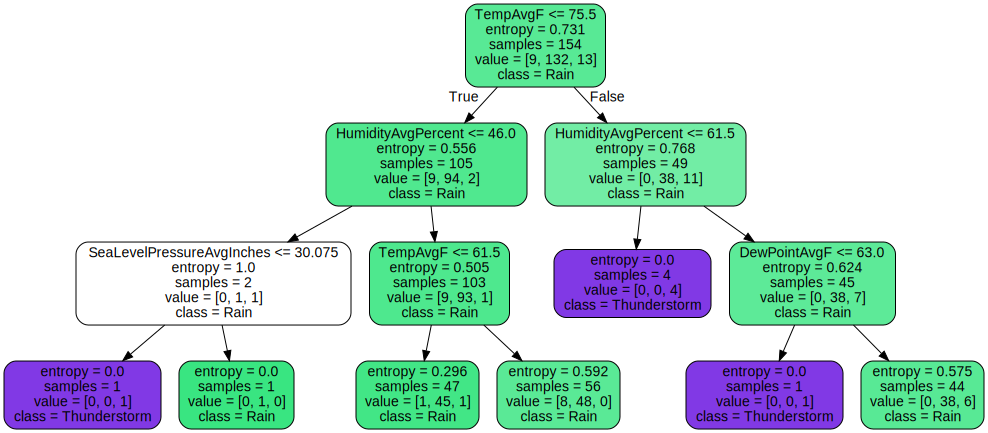

In [ ]:
dot_data = tree.export_graphviz(clfs_te[0], out_file=None, rounded=True, class_names=clfs_te[0].classes_, 
                                feature_names=list(X), filled=True)
graph = graphviz.Source(dot_data) 
graph